# Boston House Price Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
boston

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


# EDA

In [20]:
data = np.hstack([boston.values[::2, :], boston.values[1::2, :3]])
#target = boston.values[1::2, 2]
#data

In [21]:
#Convert array into DataFrame and rename columns
boston_data = pd.DataFrame(data, columns =['crime', 'land_zone', 'indus', 'C_River', 'nox','avg_rooms', 'age','dist','r_highway', 'tax', 'pt_ratio','blacks','lstat','price_median_value'])
#boston_data = pd.DataFrame(target, columns =['price_Median_value'])
#boston_data.shape
boston_original=boston_data

In [6]:
boston_data


,crime,land_zone,indus,C_River,nox,avg_rooms,age,dist,r_highway,tax,pt_ratio,blacks,lstat,price_median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [7]:
#Dropping Duplicates
boston_data.duplicated().sum()
#boston_data.drop_duplicates()
#boston_data.shape

0

In [7]:
#Check Missing Values
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime               506 non-null    float64
 1   land_zone           506 non-null    float64
 2   indus               506 non-null    float64
 3   C_River             506 non-null    float64
 4   nox                 506 non-null    float64
 5   avg_rooms           506 non-null    float64
 6   age                 506 non-null    float64
 7   dist                506 non-null    float64
 8   r_highway           506 non-null    float64
 9   tax                 506 non-null    float64
 10  pt_ratio            506 non-null    float64
 11  blacks              506 non-null    float64
 12  lstat               506 non-null    float64
 13  price_median_value  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
#Check Null Values
boston_data.isna().sum()
boston_data.isnull().sum()
#boston_data.notna().sum()
#boston_data.notnull().sum()
#boston_data.dropna()

crime                 0
land_zone             0
indus                 0
C_River               0
nox                   0
avg_rooms             0
age                   0
dist                  0
r_highway             0
tax                   0
pt_ratio              0
blacks                0
lstat                 0
price_median_value    0
dtype: int64

In [7]:
#finding Data types of Columns
boston_data.info()
#boston_data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime               506 non-null    float64
 1   land_zone           506 non-null    float64
 2   indus               506 non-null    float64
 3   C_River             506 non-null    float64
 4   nox                 506 non-null    float64
 5   avg_rooms           506 non-null    float64
 6   age                 506 non-null    float64
 7   dist                506 non-null    float64
 8   r_highway           506 non-null    float64
 9   tax                 506 non-null    float64
 10  pt_ratio            506 non-null    float64
 11  blacks              506 non-null    float64
 12  lstat               506 non-null    float64
 13  price_median_value  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# Outlier Detection

In [9]:
# 1. Detecting Outliers using describe method
boston_data.describe()

,crime,land_zone,indus,C_River,nox,avg_rooms,age,dist,r_highway,tax,pt_ratio,blacks,lstat,price_median_value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


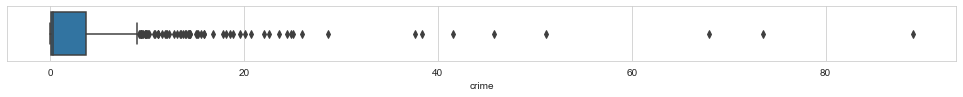

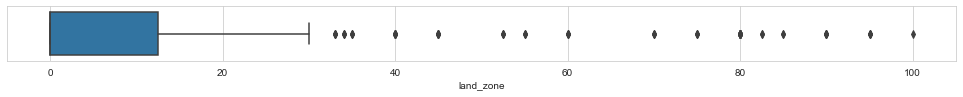

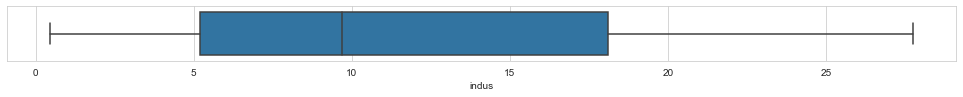

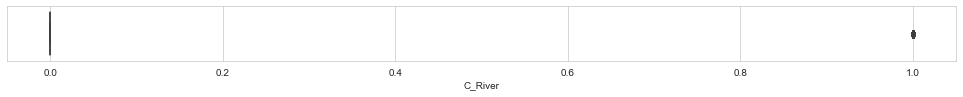

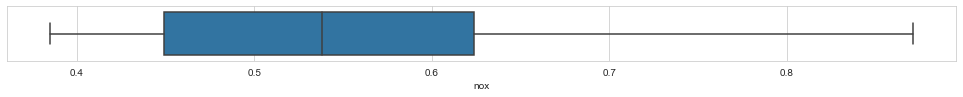

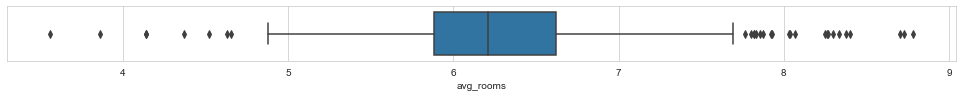

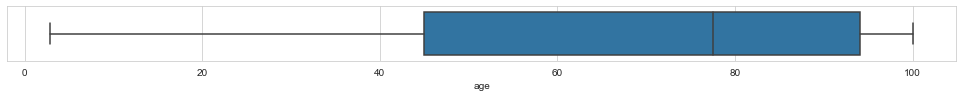

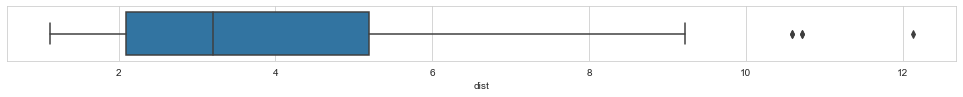

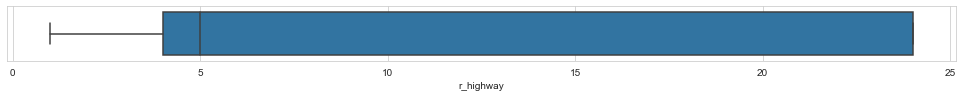

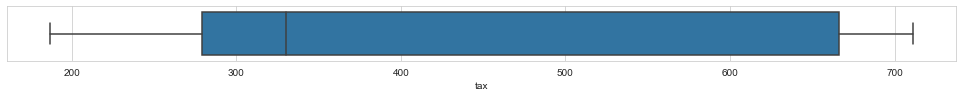

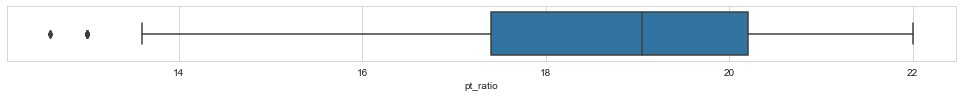

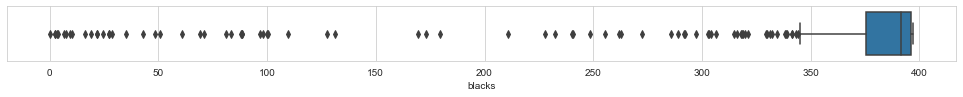

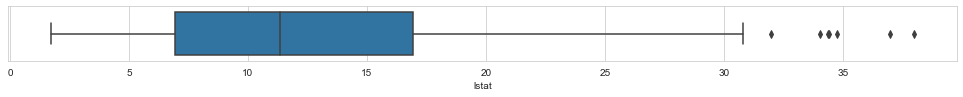

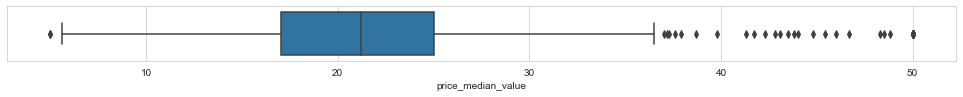

In [10]:
# 2. Detecting Outliers using Box plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

for column in boston_data:
    plt.figure(figsize=(17,1))
    sns.boxplot(x=column,data=boston_data)

#boston_data.plot(kind='box')

In [11]:
# 2. Detecting Outliers using IQR Score (Box Plot)
Q1=boston_data.quantile(0.25)
Q3=boston_data.quantile(0.75)
IQR=Q3-Q1

print(boston_data < (Q1 - 1.5 * IQR)) | (boston_data > (Q3 + 1.5 * IQR))


     crime  land_zone  indus  C_River    nox  avg_rooms    age   dist  \
0    False      False  False    False  False      False  False  False   
1    False      False  False    False  False      False  False  False   
2    False      False  False    False  False      False  False  False   
3    False      False  False    False  False      False  False  False   
4    False      False  False    False  False      False  False  False   
..     ...        ...    ...      ...    ...        ...    ...    ...   
501  False      False  False    False  False      False  False  False   
502  False      False  False    False  False      False  False  False   
503  False      False  False    False  False      False  False  False   
504  False      False  False    False  False      False  False  False   
505  False      False  False    False  False      False  False  False   

     r_highway    tax  pt_ratio  blacks  lstat  price_median_value  
0        False  False     False   False  False        

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [NoneType]

In [ ]:
# 3. Detecting Outliers using Z Score
from scipy import stats
import numpy as np
z_score=np.abs(stats.zscore(boston_data))
#print(z_score)
threshold=3
np.where(z_score > 3)
#The first array consists of list of rows and second array represents column number
z_score.iloc[55:57,1:2]

# Removal of Outliers

shape of Sample (259,)
Box plot of :  crime


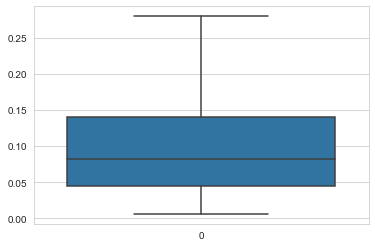

shape of Sample (372,)
Box plot of :  land_zone


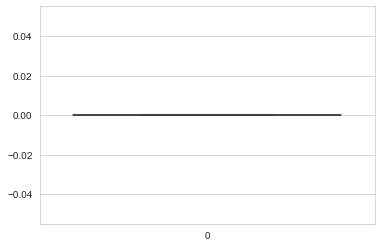

shape of Sample (506,)
Box plot of :  indus


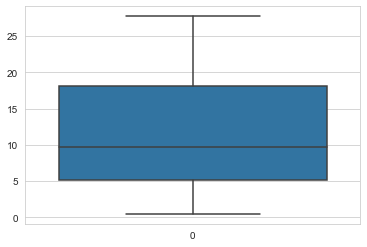

shape of Sample (471,)
Box plot of :  C_River


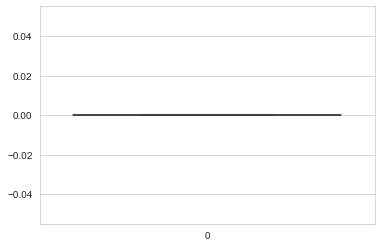

shape of Sample (506,)
Box plot of :  nox


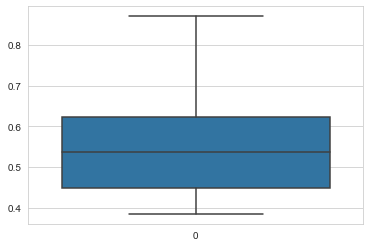

shape of Sample (471,)
Box plot of :  avg_rooms


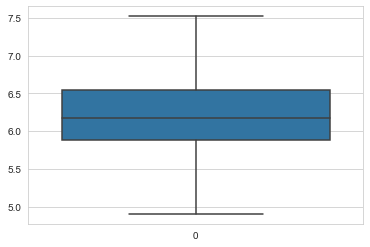

shape of Sample (506,)
Box plot of :  age


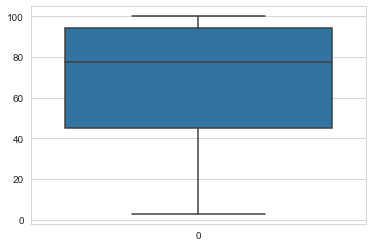

shape of Sample (501,)
Box plot of :  dist


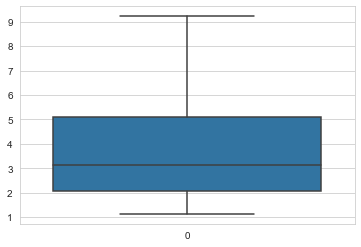

shape of Sample (506,)
Box plot of :  r_highway


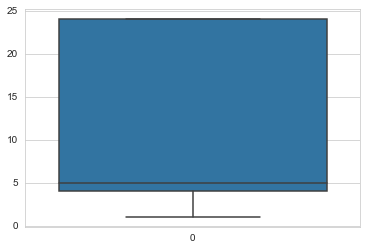

shape of Sample (506,)
Box plot of :  tax


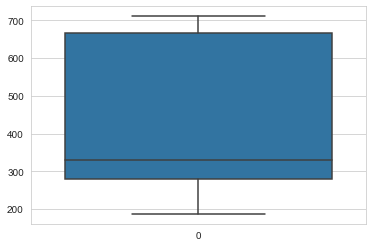

shape of Sample (491,)
Box plot of :  pt_ratio


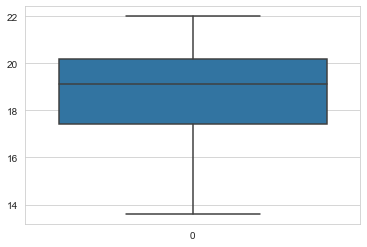

shape of Sample (343,)
Box plot of :  blacks


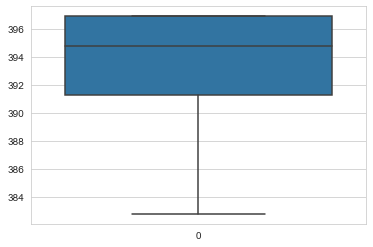

shape of Sample (499,)
Box plot of :  lstat


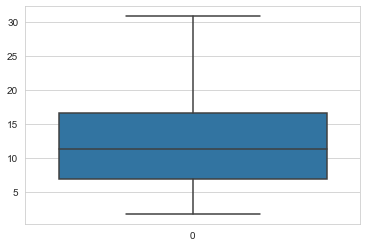

shape of Sample (457,)
Box plot of :  price_median_value


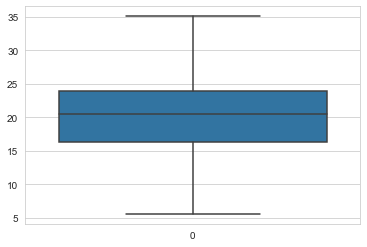

In [12]:
arr = boston_data.to_numpy()
arr=arr.transpose()

for var in range(0,arr.shape[0]):
    sample=arr[var]
    #sample= np.array([15, 101, 18, 7, 30,300,400,600,800,13, 16, 11, 21, 5, 15, 10, 103,9])
    """
    plt.boxplot(sample, vert=False)
    plt.title("Detecting outliers using Boxplot")
    plt.xlabel('Sample')
    """
    outliers = []
    def detect_outliers_iqr(data):
        data = sorted(data)
        #q1 = np.percentile(data, 25)
        #q3 = np.percentile(data, 75)
        q1 = np.quantile(data,0.25)
        q3 = np.quantile(data,0.75)

        # print(q1, q3)
        IQR = q3-q1
        lwr_bound = q1-(1.5*IQR)
        #print("\nLower Bound",lwr_bound)
        upr_bound = q3 + (1.5*IQR)
        #print("\nUpper Bound",upr_bound)
        # print(lwr_bound, upr_bound)
        #print(data)
        for i in data: 
            if (i<lwr_bound or i>upr_bound):
                outliers.append(i)
        return outliers# Driver code

    sample_outliers = detect_outliers_iqr(sample)
    #print("Outliers from IQR method: ", sample_outliers)
    while(len(sample_outliers)!=0):
        # Trimming 
        for i in sample_outliers:
            a = np.delete(sample, np.where(sample==i))
            #a = sample[sample != i]
            sample=a
            #print("For loop of Sample",sample)

        sample_outliers.clear()
        #print("\nSample Outliers:",sample_outliers)
        sample_outliers = detect_outliers_iqr(sample)
        #print("Outliers from IQR method: ", sample_outliers)

    print("shape of Sample",sample.shape)   
    #plt.boxplot(sample, vert=False)
    print("Box plot of : ", boston_data.columns[var])
    sns.boxplot(data=sample)
    plt.show()

    

# Median values Imputation for Outliers


 crime


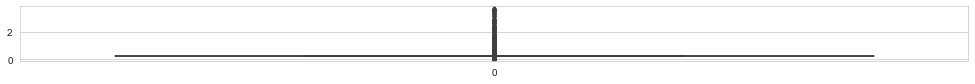


 land_zone


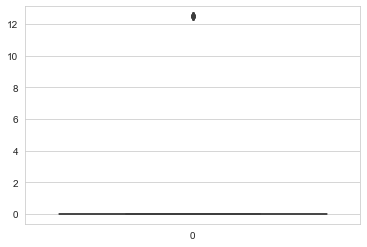


 indus


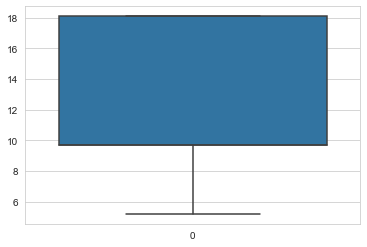


 C_River


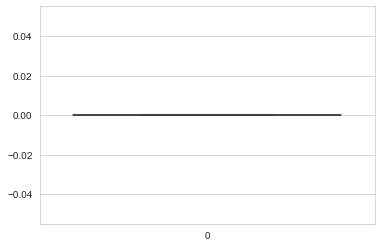


 nox


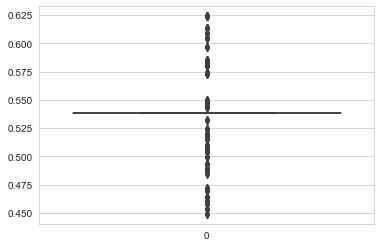


 avg_rooms


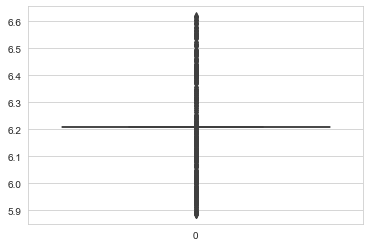


 age


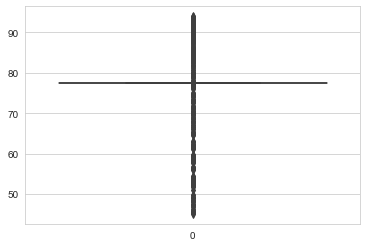


 dist


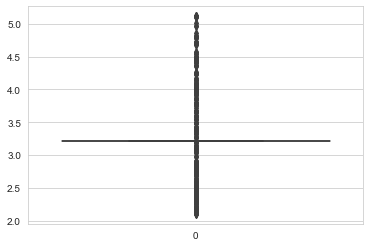


 r_highway


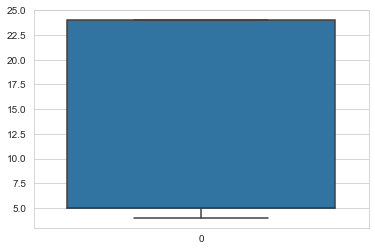


 tax


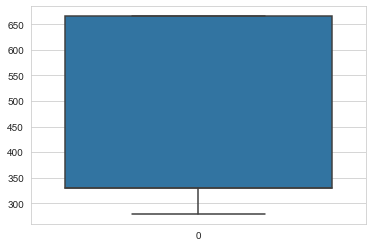


 pt_ratio


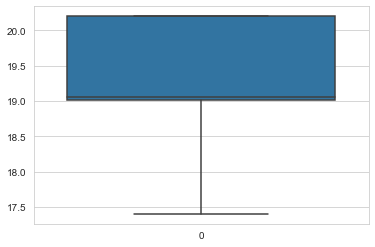


 blacks


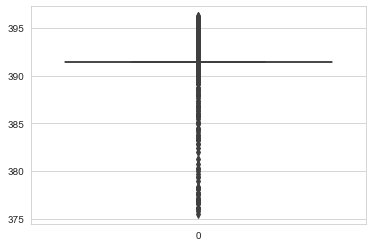


 lstat


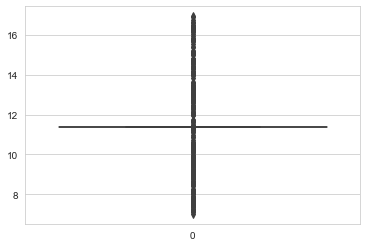


 price_median_value


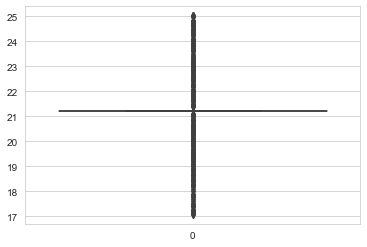

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime               506 non-null    float64
 1   land_zone           506 non-null    float64
 2   indus               506 non-null    float64
 3   C_River             506 non-null    float64
 4   nox                 506 non-null    float64
 5   avg_rooms           506 non-null    float64
 6   age                 506 non-null    float64
 7   dist                506 non-null    float64
 8   r_highway           506 non-null    float64
 9   tax                 506 non-null    float64
 10  pt_ratio            506 non-null    float64
 11  blacks              506 non-null    float64
 12  lstat               506 non-null    float64
 13  price_median_value  506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


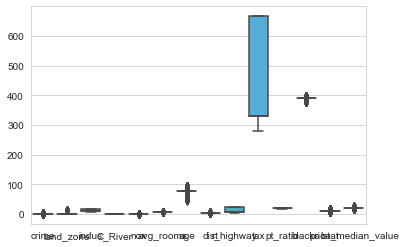

In [13]:
boston_data=boston_original
plt.figure(figsize=(17,1))
for var in range(0,boston_data.shape[1]):
    temp=boston_data.columns[var]
    lower_quant=boston_data[temp].quantile(0.25)
    upper_quant=boston_data[temp].quantile(0.75)
    med=boston_data[temp].median()
    #print("\nColumn :",temp)
    #print("Lower Quantile:",lower_quant, "Upper Quantile :",upper_quant,"Median :",med)
    
    boston_data[temp] = np.where( (boston_data[temp] <lower_quant), med , boston_data[temp]) 
    boston_data[temp] = np.where( (boston_data[temp] >upper_quant), med , boston_data[temp])
    print("\n",boston_data.columns[var])
    sns.boxplot(data=boston_data[temp])
    plt.show()
        
#After Outlier Median imputation 
boston_clean=boston_data
sns.boxplot(data=boston_clean)
boston_clean.info()
#boston_data.describe()

# Feature Selection

In [14]:
#spliting data in test and train data set
X=boston_clean.iloc[: , :-1]
y=boston_clean.iloc[: , -1]

#OR
#X = boston_clean.drop(['price_median_value'], axis=1)
#y = boston_clean['price_median_value']

In [15]:
X.shape, y.shape

((506, 13), (506,))

<AxesSubplot:>

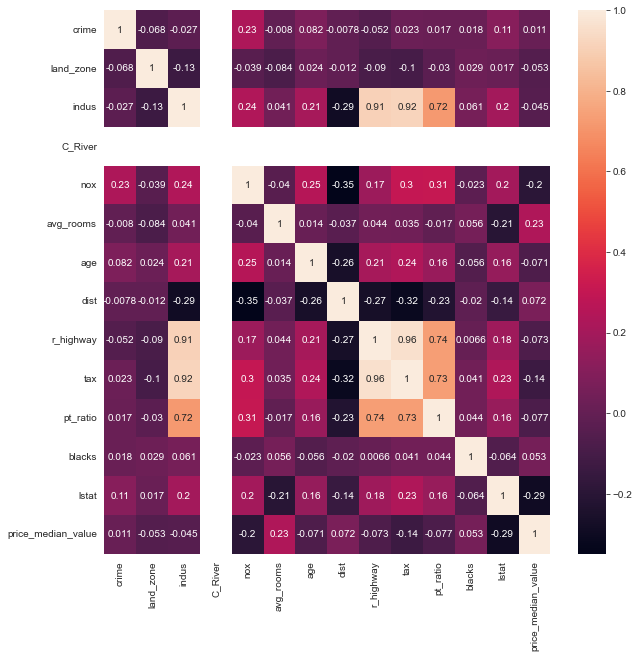

In [16]:
#pearson Correlation Coefficient
#cor=boston_clean.corr(method='spearman')
#cor=boston_clean.corr(method='kendall')
#cor=boston_clean.corr(method='pearson')
cor=boston_clean.corr()
#print(cor)
#plot Heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(cor,annot=True)

In [17]:
 # Select upper triangle of correlation matrix
upper = boston_clean.corr().where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))
upper   

C:\Users\pc\AppData\Local\Temp/ipykernel_15656/162362559.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = boston_clean.corr().where(np.triu(np.ones(cor.shape), k=1).astype(np.bool))


,crime,land_zone,indus,C_River,nox,avg_rooms,age,dist,r_highway,tax,pt_ratio,blacks,lstat,price_median_value
crime,NaN,-0.067679,-0.027472,NaN,0.226501,-0.007969,0.081780,-0.007753,-0.052459,0.023375,0.016861,0.017811,0.112535,0.011048
land_zone,NaN,NaN,-0.134685,NaN,-0.038573,-0.083530,0.024306,-0.011743,-0.089944,-0.101075,-0.029630,0.029282,0.017245,-0.052947
indus,NaN,NaN,NaN,NaN,0.238935,0.040601,0.208763,-0.291565,0.907655,0.919751,0.719599,0.060556,0.198262,-0.045212
C_River,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
nox,NaN,NaN,NaN,NaN,NaN,-0.039801,0.252432,-0.349602,0.174979,0.303347,0.307738,-0.023498,0.195774,-0.196392
avg_rooms,NaN,NaN,NaN,NaN,NaN,NaN,0.013594,-0.036682,0.044089,0.035331,-0.017136,0.055969,-0.206928,0.234293
age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.260284,0.205423,0.240238,0.162135,-0.056186,0.155072,-0.070650
dist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.267056,-0.315765,-0.225207,-0.019882,-0.144451,0.071638
r_highway,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.958558,0.735159,0.006633,0.180851,-0.073264
tax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.734843,0.041205,0.232243,-0.137240


# Wrapper Method for Feature Selection

In [18]:
#1. Forward Feature Selection
boston_data=boston_original

#spliting data in test and train data set
X=boston_clean.iloc[: , :-1]
y=boston_clean.iloc[: , -1]

#importing the models 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
#calling the linear Regression Model
lreg=LinearRegression()
sfs_Forward=sfs(lreg, k_features=10, forward=True, verbose=2, scoring='neg_mean_squared_error')
sfs_Forward=sfs_Forward.fit(X,y)
feat_names = list(sfs_Forward.k_feature_names_)
#print(feat_names)
#Creating a new dataframe using the above variables
boston_f_selection = boston_clean[feat_names]
boston_f_selection['price_median_value']=boston_clean['price_median_value']
boston_f_selection


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-03-12 10:39:49] Features: 1/10 -- score: -2.298260612306035[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-03-12 10:39:50] Features: 2/10 -- score: -2.2425217060549927[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-03-12 10:39:50] Features: 3/10 -- score: -2.2296295048569705[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done

,crime,land_zone,indus,C_River,nox,avg_rooms,dist,r_highway,tax,lstat,price_median_value
0,0.25651,0.0,9.69,0.0,0.538,6.5750,4.09000,5.0,296.0,11.36,24.0
1,0.25651,0.0,7.07,0.0,0.469,6.4210,4.96710,5.0,330.0,9.14,21.6
2,0.25651,0.0,7.07,0.0,0.469,6.2085,4.96710,5.0,330.0,11.36,21.2
3,0.25651,0.0,9.69,0.0,0.458,6.2085,3.20745,5.0,330.0,11.36,21.2
4,0.25651,0.0,9.69,0.0,0.458,6.2085,3.20745,5.0,330.0,11.36,21.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.25651,0.0,11.93,0.0,0.573,6.5930,2.47860,5.0,330.0,9.67,22.4
502,0.25651,0.0,11.93,0.0,0.573,6.1200,2.28750,5.0,330.0,9.08,20.6
503,0.25651,0.0,11.93,0.0,0.573,6.2085,2.16750,5.0,330.0,11.36,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.2085,2.38890,5.0,330.0,11.36,22.0


In [82]:
#2. Backward Selection
boston_data=boston_original
#spliting data in test and train data set
X=boston_clean.iloc[: , :-1]
y=boston_clean.iloc[: , -1]

#importing the models 
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
#calling the linear Regression Model
lreg=LinearRegression()
sfs_Forward=sfs(lreg, k_features=10, forward=False, verbose=2, scoring='r2')
sfs_Forward=sfs_Forward.fit(X,y)
feat_names = list(sfs_Forward.k_feature_names_)
#print(feat_names)
#Creating a new dataframe using the above variables
boston_f_selection = boston_clean[feat_names]
boston_f_selection['price_median_value']=boston_clean['price_median_value']
boston_f_selection


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    0.1s finished

[2022-03-09 09:58:37] Features: 12/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.1s finished

[2022-03-09 09:58:38] Features: 11/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.1s finished

[2022-03-09 09:58:38] Features: 10/4 -- score: 1.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:  

,crime,land_zone,indus,C_River,price_median_value
0,0.25651,0.0,9.69,0.0,21.2
1,0.25651,0.0,9.69,0.0,21.2
2,0.25651,0.0,9.69,0.0,21.2
3,0.25651,0.0,9.69,0.0,21.2
4,0.25651,0.0,9.69,0.0,21.2
...,...,...,...,...,...
501,0.25651,0.0,11.93,0.0,21.2
502,0.25651,0.0,11.93,0.0,21.2
503,0.25651,0.0,11.93,0.0,21.2
504,0.25651,0.0,11.93,0.0,21.2


In [87]:
#3. Exaustive Feature Selection
boston_data=boston_original
#spliting data in test and train data set
X=boston_clean.iloc[: , :-1]
y=boston_clean.iloc[: , -1]

#importing the models 
from mlxtend.feature_selection import ExhaustiveFeatureSelector as sfs
from sklearn.linear_model import LinearRegression
#calling the linear Regression Model
lreg=LinearRegression()
sfs_Exh=sfs(lreg, min_features=1,max_features=10, print_progress=True, cv=5, scoring='r2')
sfs_Exh=sfs_Exh.fit(X,y)

#Creating a new dataframe using the above variables
feat_names = list(sfs_Exh.best_feature_names_)
print(feat_names)
print('Best accuracy score: %.2f' % sfs_Exh.best_score_)
boston_f_selection = boston_clean[feat_names]
boston_f_selection['price_median_value']=boston_clean['price_median_value']
boston_f_selection


Features: 8099/8099

['avg_rooms']
Best accuracy score: 1.00


C:\Users\pc\AppData\Local\Temp/ipykernel_5372/3281075961.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  boston_f_selection['price_median_value']=boston_clean['price_median_value']


,avg_rooms,price_median_value
0,6.2085,21.2
1,6.2085,21.2
2,6.2085,21.2
3,6.2085,21.2
4,6.2085,21.2
...,...,...
501,6.2085,21.2
502,6.2085,21.2
503,6.2085,21.2
504,6.2085,21.2


In [86]:
#4. Recursive Feature Selection
boston_data=boston_original
#spliting data in test and train data set
X=boston_clean.iloc[: , :-1]
y=boston_clean.iloc[: , -1]

#importing the models 
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
#calling the linear Regression Model
lreg=LinearRegression()
sfs_RFE=RFE(lreg, n_features_to_select=4)
sfs_RFE=sfs_RFE.fit(X,y)

print("Ranking",sfs_RFE.ranking_)
print("Support",sfs_RFE.support_)
boston_data.info()
#Score
sfs_RFE.score(X,y)
#Creating a new dataframe using the above variables
#feat_names = list(sfs_RFE.ranking_)
#print(feat_names)
#print('Best accuracy score: %.2f' % sfs_RFE.)
#boston_f_selection = boston_clean[feat_names]
#boston_f_selection['price_median_value']=boston_clean['price_median_value']
#boston_f_selection

Ranking [10  9  7  6  2  1  4  1  3  8  5  1  1]
Support [False False False False False  True False  True False False False  True
  True]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   crime               506 non-null    float64
 1   land_zone           506 non-null    float64
 2   indus               506 non-null    float64
 3   C_River             506 non-null    float64
 4   nox                 506 non-null    float64
 5   avg_rooms           506 non-null    float64
 6   age                 506 non-null    float64
 7   dist                506 non-null    float64
 8   r_highway           506 non-null    float64
 9   tax                 506 non-null    float64
 10  pt_ratio            506 non-null    float64
 11  blacks              506 non-null    float64
 12  lstat               506 non-null    float64
 13  price_median_valu

1.0

# Filter Method for Feature Selection

In [40]:
#ANOVA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Select Features With Best ANOVA F-Values

# Create an SelectKBest object to select features with two best ANOVA F-Values
fvalue_selector = SelectKBest(f_classif, k=4)

# Apply the SelectKBest object to the features and target
X_kbest = fvalue_selector.fit_transform(X, y)
print("Scores\n",fvalue_selector.scores_)
print("Pvalues\n",fvalue_selector.pvalues_)


Scores
 [0.91184007 1.61472481 1.38029859        nan 1.82687819 1.9951479
 1.26337136 0.93882307 1.29090432 1.34013714 0.81957009 1.2112041
 1.78103568]
Pvalues
 [6.84471489e-01 1.71658498e-03 2.57095543e-02            nan
 1.00313743e-04 8.71406463e-06 7.92123197e-02 6.24330467e-01
 6.17356314e-02 3.85737646e-02 8.57331903e-01 1.23442828e-01
 1.90044041e-04]


C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:114: UserWarning: Features [3] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx,
C:\Users\pc\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


# Prediction Model

# Considering original Dataset

In [23]:
#Linear Regression Library
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures

#spliting data in test and train data set
X=boston_original.iloc[: , :-1]
y=boston_original.iloc[: , -1]

#dividing data into training and Testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

#models
linearModel=LinearRegression().fit(X_train,y_train)
ridgeModel=Ridge().fit(X_train,y_train)
lassoModel=Lasso().fit(X_train,y_train)
elasticNetModel=ElasticNet().fit(X_train,y_train)
randomForestRegressor=RandomForestRegressor().fit(X_train,y_train)
sVRegressor=SVR().fit(X_train,y_train)
decisionTreeRegressor=DecisionTreeRegressor().fit(X_train,y_train)
kNeighborsRegressor=KNeighborsRegressor().fit(X_train,y_train)
#polynomialFeatures=PolynomialFeatures().fit(X_train,y_train)

#Evaluating the Linear Regression Model
print("Linear Regression",linearModel.score(X_test,y_test))
print("Ridge Regression",ridgeModel.score(X_test,y_test))
print("Lasso Regression",lassoModel.score(X_test,y_test))
print("Elastic Net Regression",elasticNetModel.score(X_test,y_test))
print("Random Forest Regression",randomForestRegressor.score(X_test,y_test))
print("Support Vector Regression",sVRegressor.score(X_test,y_test))
print("Decision Tree Regression",decisionTreeRegressor.score(X_test,y_test))
print("K Nearest Neighbor Regression",kNeighborsRegressor.score(X_test,y_test))
#print("Polynomial Regression",polynomialFeatures.(X_test,y_test))
boston_data

Linear Regression 0.6844375146865953
Ridge Regression 0.6823625013851438
Lasso Regression 0.6579203522925794
Elastic Net Regression 0.6608350120342019
Random Forest Regression 0.8889381364463124
Support Vector Regression 0.21295662162390572
Decision Tree Regression 0.7997640930675656
K Nearest Neighbor Regression 0.5655510113672045


,crime,land_zone,indus,C_River,nox,avg_rooms,age,dist,r_highway,tax,pt_ratio,blacks,lstat,price_median_value
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# Considering Reduced Features

In [88]:
#Linear Regression Library
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import PolynomialFeatures

#spliting data in test and train data set- use feature selected data
X=boston_f_selection.iloc[: , :-1]
y=boston_f_selection.iloc[: , -1]

#dividing data into training and Testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

#Models
linearModel=LinearRegression().fit(X_train,y_train)
ridgeModel=Ridge().fit(X_train,y_train)
lassoModel=Lasso().fit(X_train,y_train)
elasticNetModel=ElasticNet().fit(X_train,y_train)
randomForestRegressor=RandomForestRegressor().fit(X_train,y_train)
sVRegressor=SVR().fit(X_train,y_train)
decisionTreeRegressor=DecisionTreeRegressor().fit(X_train,y_train)
kNeighborsRegressor=KNeighborsRegressor().fit(X_train,y_train)
#polynomialFeatures=PolynomialFeatures().fit(X_train,y_train)

#Evaluating the Linear Regression Model
print("Linear Regression",linearModel.score(X_test,y_test))
print("Ridge Regression",ridgeModel.score(X_test,y_test))
print("Lasso Regression",lassoModel.score(X_test,y_test))
print("Elastic Net Regression",elasticNetModel.score(X_test,y_test))
print("Random Forest Regression",randomForestRegressor.score(X_test,y_test))
print("Support Vector Regression",sVRegressor.score(X_test,y_test))
print("Decision Tree Regression",decisionTreeRegressor.score(X_test,y_test))
print("K Nearest Neighbor Regression",kNeighborsRegressor.score(X_test,y_test))
#print("Polynomial Regression",polynomialFeatures.(X_test,y_test))

Linear Regression 1.0
Ridge Regression 0.5555555555555556
Lasso Regression 0.5555555555555556
Elastic Net Regression 0.5555555555555556
Random Forest Regression -1.7777777777777777
Support Vector Regression 1.0
Decision Tree Regression -74.11111111111111
K Nearest Neighbor Regression 1.0


# Consider Median Imputed data

In [90]:
#Linear Regression Library
from sklearn.linear_model import LinearRegression, Ridge, Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR 
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
#from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

#spliting data in test and train data set
X=boston_clean.iloc[: , :-1]
y=boston_clean.iloc[: , -1]

#dividing data into training and Testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

#Models
linearModel=LinearRegression().fit(X_train,y_train)
ridgeModel=Ridge().fit(X_train,y_train)
lassoModel=Lasso().fit(X_train,y_train)
elasticNetModel=ElasticNet().fit(X_train,y_train)
randomForestRegressor=RandomForestRegressor().fit(X_train,y_train)
sVRegressor=SVR().fit(X_train,y_train)
decisionTreeRegressor=DecisionTreeRegressor().fit(X_train,y_train)
kNeighborsRegressor=KNeighborsRegressor().fit(X_train,y_train)
#polynomialFeatures=PolynomialFeatures().fit(X_train,y_train)

#Evaluating the Linear Regression Model
print("Linear Regression",linearModel.score(X_test,y_test))
print("Ridge Regression",ridgeModel.score(X_test,y_test))
print("Lasso Regression",lassoModel.score(X_test,y_test))
print("Elastic Net Regression",elasticNetModel.score(X_test,y_test))
print("Random Forest Regression",randomForestRegressor.score(X_test,y_test))
print("Support Vector Regression",sVRegressor.score(X_test,y_test))
print("Decision Tree Regression",decisionTreeRegressor.score(X_test,y_test))
print("K Nearest Neighbor Regression",kNeighborsRegressor.score(X_test,y_test))
#print("Polynomial Regression",polynomialFeatures.(X_test,y_test))

Linear Regression 0.5555555555555556
Ridge Regression 0.5555555555555556
Lasso Regression 0.5555555555555556
Elastic Net Regression 0.5555555555555556
Random Forest Regression 0.022875816993464082
Support Vector Regression 1.0
Decision Tree Regression -29.847494553376908
K Nearest Neighbor Regression 1.0


# Multi-linear Regression on original data

Accuracy :rsquared 74.06426641094093 rsquared_adj 73.37897263724629
Predicted Data is  0    23.54557
dtype: float64


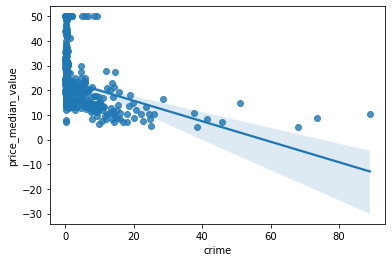

In [8]:
import statsmodels.formula.api as smf
model = smf.ols("price_median_value~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat",data = boston_original).fit()
sns.regplot(x="crime", y="price_median_value", data=boston_original)
#t and p-Values
#print(model.tvalues, '\n', model.pvalues)  
#Coefficients
#model.params
#R squared values/ Accurarcy
print("Accuracy :rsquared",(model.rsquared*100), "rsquared_adj",(model.rsquared_adj*100))
#predic for new data

data_pred=pd.DataFrame(data=np.array([[0.25651,0.0,9.69,0.0,0.538,6.5750,65.2,4.09000,5.0,296.0,19.05,391.44,11.36]]),columns=['crime','land_zone','indus','C_River','nox','avg_rooms','age','dist','r_highway','tax','pt_ratio','blacks','lstat'])
#data_pred
print("Predicted Data is ",model.predict(data_pred))

# Multi-linear regression on Median values Imputated data

Accuracy :rsquared 19.517166501987305 rsquared_adj 17.55815229919593
Predicted Data is  0    22.401191
dtype: float64


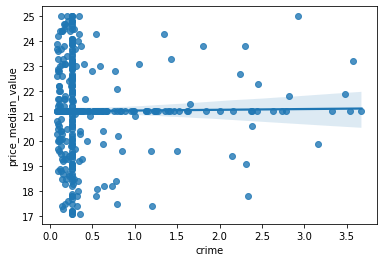

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [12]:
#preparing Model
model = smf.ols("price_median_value~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat",data = boston_original).fit()
model